In [1]:
from preprocessing import readcounts_processing_pipeline, pheno_processing_pipeline
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
load_dotenv()
root = os.environ.get("root_folder")

In [2]:
pheno_df_train = pd.read_csv(root + '/train/pheno_training.csv')
pheno_df_train.describe()

pheno_df_test = pd.read_csv(root +  '/test/pheno_test.csv')


In [3]:
from preprocessing import check_data
imputation = 'delete'
pheno_df_train = check_data(pheno_df_train, True, imputation)
pheno_df_test = check_data(pheno_df_test, False, imputation)

Column BodyMassIndex has 1 missing values
Column Smoking has 16 missing values
Column PrevalentDiabetes has 51 missing values
Column PrevalentCHD has 51 missing values
Column PrevalentHFAIL has 51 missing values
Column Event has 51 missing values
Column Event_time has 51 missing values
Column NonHDLcholesterol has 7 missing values
Deleted 75 rows with missing values
Column Smoking has 11 missing values
Column PrevalentDiabetes has 30 missing values
Column PrevalentCHD has 30 missing values
Column PrevalentHFAIL has 30 missing values
Column Event has 30 missing values
Column Event_time has 30 missing values
Column SystolicBP has 1 missing values
Column NonHDLcholesterol has 3 missing values
Deleted 45 rows with missing values


Text(0.5, 23.52222222222222, 'Time (years)')

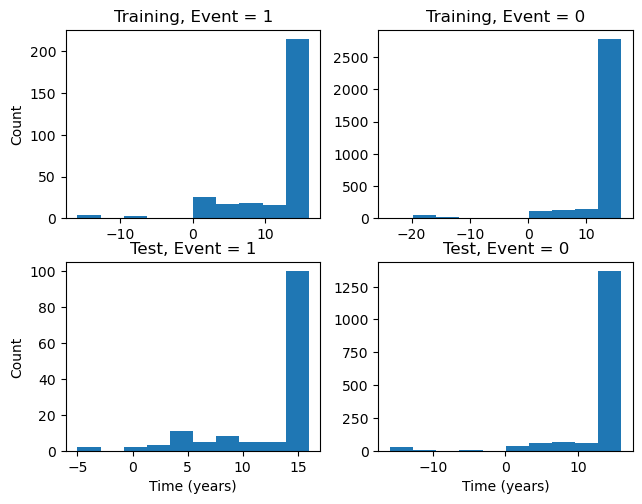

In [4]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
fig.tight_layout() 
axs[0, 0].hist(pheno_df_train.loc[pheno_df_train.Event == 1].Event_time)
axs[0, 0].set_title("Training, Event = 1")
axs[0, 0].set_ylabel('Count')

axs[0, 1].hist(pheno_df_train.loc[pheno_df_train.Event == 0].Event_time)
axs[0, 1].set_title("Training, Event = 0")

axs[1, 0].hist(pheno_df_test.loc[pheno_df_test.Event ==  1].Event_time)
axs[1, 0].set_title("Test, Event = 1")
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(pheno_df_test.loc[pheno_df_test.Event == 0].Event_time)
axs[1, 1].set_title("Test, Event = 0")
axs[1, 1].set_xlabel('Time (years)')

- 2.6% of the patients in the cohort previously experienced HF.
- 8.4% of the patients have experienced HF after baseline

Note that the Event corresponds to HF after baseline ("excluding those occur before baseline" )

### Check that all patients with PrevalentHFAIL = 1 indeed have Event_time <0

In [5]:
(pheno_df_train["PrevalentHFAIL"] == 1).sum()

92

93 patients experienced HF before the baseline

In [6]:
(pheno_df_train["Event_time"] < 0).sum()

92

In [7]:
((pheno_df_train["Event_time"] < 0) & (pheno_df_train["PrevalentHFAIL"] == 1)).sum()  

92

### Check that all patients with Event_time <0 (that is, PrevalentHFAIL == 1) have Event == 0

In [8]:
artifacts = (pheno_df_train["Event_time"] < 0) & (pheno_df_train["Event"] == 1) 
artifacts.sum() 

7

This is an artifact from the simulation (see discussion on the challenge page)

In [10]:
pheno_df_train = pheno_processing_pipeline(pheno_df_train, training = True)
pheno_df_test = pheno_processing_pipeline(pheno_df_test, training = False)
pheno_df_train

Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
Simulated_328,53.618,24.127,False,False,False,False,False,False,15.75,133.077,3.020,False
Simulated_1644,36.811,27.992,False,False,False,False,False,False,15.881,108.914,5.480,False
Simulated_1710,49.429,23.664,False,False,False,False,False,False,15.891,110.064,4.388,True
Simulated_1732,48.842,26.804,False,False,False,False,False,False,15.918,128.059,5.119,False
Simulated_1727,60.738,29.862,False,False,False,False,False,False,15.841,169.913,5.740,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,33.802,37.049,False,False,False,False,False,False,15.942,109.080,3.141,False
Simulated_3425,69.249,36.800,False,False,True,False,False,False,15.781,145.953,5.478,True
Simulated_1789,28.561,26.463,False,False,False,False,False,False,12.198,124.091,4.870,True
Simulated_1592,70.278,31.945,False,True,False,False,False,False,15.609,142.038,2.492,False


- BPTreatment = Blood pressure treatment
- Prevalent CHD = Prevalent coronary heart disease

### Check that training set and test set do not intersect

In [11]:
pheno_df_train

Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
Simulated_328,53.618,24.127,False,False,False,False,False,False,15.75,133.077,3.020,False
Simulated_1644,36.811,27.992,False,False,False,False,False,False,15.881,108.914,5.480,False
Simulated_1710,49.429,23.664,False,False,False,False,False,False,15.891,110.064,4.388,True
Simulated_1732,48.842,26.804,False,False,False,False,False,False,15.918,128.059,5.119,False
Simulated_1727,60.738,29.862,False,False,False,False,False,False,15.841,169.913,5.740,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,33.802,37.049,False,False,False,False,False,False,15.942,109.080,3.141,False
Simulated_3425,69.249,36.800,False,False,True,False,False,False,15.781,145.953,5.478,True
Simulated_1789,28.561,26.463,False,False,False,False,False,False,12.198,124.091,4.870,True
Simulated_1592,70.278,31.945,False,True,False,False,False,False,15.609,142.038,2.492,False


In [12]:
# Calling merge() function
int_df = pd.merge(pheno_df_train, pheno_df_test, how ='inner')
print(int_df)

Empty DataFrame
Columns: [Age, BodyMassIndex, Smoking, BPTreatment, PrevalentDiabetes, PrevalentCHD, PrevalentHFAIL, Event, Event_time, SystolicBP, NonHDLcholesterol, Sex]
Index: []


In [14]:
import scipy.stats  as stats
crosstab = pd.crosstab(pheno_df_train['Smoking'], pheno_df_train['Event'])
crosstab

Event,False,True
Smoking,,
False,2466,237
True,776,54


In [15]:
stats.chi2_contingency(crosstab)

(4.004770759834942,
 0.04537166672982941,
 1,
 array([[2480.3639966,  222.6360034],
        [ 761.6360034,   68.3639966]]))

In [17]:
crosstab = pd.crosstab(pheno_df_train['BPTreatment'], pheno_df_train['Event'])
crosstab

Event,False,True
BPTreatment,,
False,2744,238
True,498,53


In [18]:
stats.chi2_contingency(crosstab)

(1.440657585407854,
 0.23003295848132235,
 1,
 array([[2736.38380979,  245.61619021],
        [ 505.61619021,   45.38380979]]))

In [20]:
crosstab = pd.crosstab(pheno_df_train['PrevalentDiabetes'], pheno_df_train['Event'])
crosstab

Event,False,True
PrevalentDiabetes,,
False,3042,271
True,200,20


In [21]:
stats.chi2_contingency(crosstab)

(0.1220324869519188,
 0.7268404633320662,
 1,
 array([[3040.12057741,  272.87942259],
        [ 201.87942259,   18.12057741]]))

In [23]:
crosstab = pd.crosstab(pheno_df_train['Sex'], pheno_df_train['Event'])
crosstab

Event,False,True
Sex,,
False,1808,156
True,1434,135


In [24]:
stats.chi2_contingency(crosstab)

(0.4208648156826076,
 0.5165058332263577,
 1,
 array([[1802.23266346,  161.76733654],
        [1439.76733654,  129.23266346]]))

In [26]:
crosstab = pd.crosstab(pheno_df_train['PrevalentCHD'], pheno_df_train['Event'])
crosstab

Event,False,True
PrevalentCHD,,
False,3142,274
True,100,17


In [27]:
stats.chi2_contingency(crosstab)

(5.508937562618371,
 0.018919536180906665,
 1,
 array([[3134.63685253,  281.36314747],
        [ 107.36314747,    9.63685253]]))

In [28]:
from sklearn.linear_model import LogisticRegression

lgc = LogisticRegression().fit(pheno_df_train['BodyMassIndex'].to_numpy().reshape(-1,1), pheno_df_train['Event'])
 

### Are some participants censored for other reasons than study end? 

In [29]:
y = np.concatenate([pheno_df_train.Event_time,pheno_df_train.Event_time])
times = np.percentile(y, np.linspace(5, 95, 15)) #We set the upper bound to the 95% percentile of observed time points, because the censoring rate is quite large at 91.5%.

tau = times[-1]

Text(0.5, 23.52222222222222, 'Time (years)')

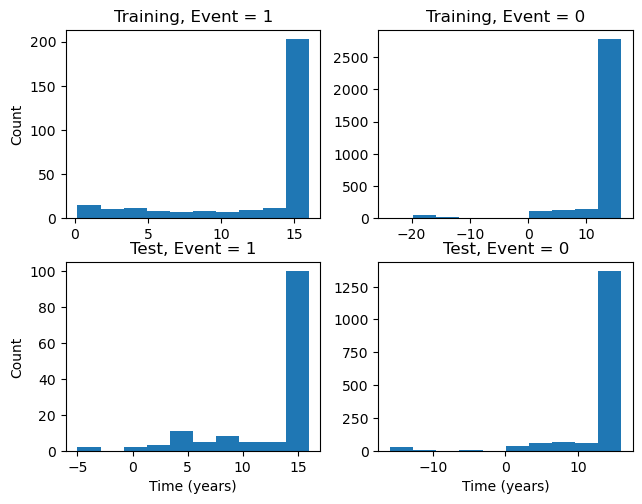

In [30]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
fig.tight_layout() 
axs[0, 0].hist(pheno_df_train.loc[pheno_df_train.Event].Event_time)
axs[0, 0].set_title("Training, Event = 1")
axs[0, 0].set_ylabel('Count')

axs[0, 1].hist(pheno_df_train.loc[~pheno_df_train.Event].Event_time)
axs[0, 1].set_title("Training, Event = 0")

axs[1, 0].hist(pheno_df_test.loc[pheno_df_test.Event].Event_time)
axs[1, 0].set_title("Test, Event = 1")
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(pheno_df_test.loc[~pheno_df_test.Event].Event_time)
axs[1, 1].set_title("Test, Event = 0")
axs[1, 1].set_xlabel('Time (years)')

In [31]:
df  = pheno_df_train
df.loc[df.Event].loc[df.Event_time == 16.0]  

Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
Simulated_1681,60.941,34.778,False,False,False,False,False,True,16.0,135.097,2.631,False
Simulated_74,65.732,24.110,False,False,False,False,False,True,16.0,133.943,5.371,True
Simulated_4838,68.770,27.474,False,False,False,True,False,True,16.0,196.956,3.340,False
Simulated_3324,46.998,21.275,False,False,False,False,False,True,16.0,111.983,2.419,True
Simulated_4149,72.881,30.566,False,False,False,False,False,True,16.0,143.058,3.321,False
Simulated_4507,55.170,33.035,False,False,False,False,False,True,16.0,123.971,4.690,True


In [32]:
from preprocessing import check_data
imputation = 'delete'
check_data(pheno_df_train, True, imputation)
pheno_df_test = check_data(pheno_df_test, False, imputation)

Number of rows with missing values: 0
Number of rows with missing values: 0


### Check that training and test sets have similar characteristics

In [ ]:
pheno_df_train.Event_time.max()

16.0

(array([[9.70120521e-03, 8.73108469e-03, 6.79084365e-03, 1.45518078e-02,
         1.55219283e-02, 1.35816873e-02, 1.26115668e-02, 3.88048208e-03,
         1.16414462e-02, 9.70120521e-03, 1.45518078e-02, 1.16414462e-02,
         1.35816873e-02, 2.03725309e-02, 1.06713257e-02, 6.79084365e-03,
         1.74621694e-02, 3.88048208e-03, 7.76096417e-03, 1.26115668e-02,
         1.35816873e-02, 1.16414462e-02, 1.45518078e-02, 6.79084365e-03,
         8.73108469e-03, 1.16414462e-02, 8.73108469e-03, 1.64920489e-02,
         1.26115668e-02, 1.55219283e-02, 9.70120521e-03, 1.26115668e-02,
         9.70120521e-03, 1.55219283e-02, 1.26115668e-02, 9.70120521e-03,
         9.70120521e-03, 1.06713257e-02, 1.84322899e-02, 1.26115668e-02,
         1.06713257e-02, 1.45518078e-02, 1.74621694e-02, 1.74621694e-02,
         2.32828925e-02, 1.64920489e-02, 1.06713257e-02, 1.06713257e-02,
         1.45518078e-02, 2.54559625e+00],
        [5.80998378e-03, 9.68330631e-03, 5.80998378e-03, 1.16199676e-02,
         

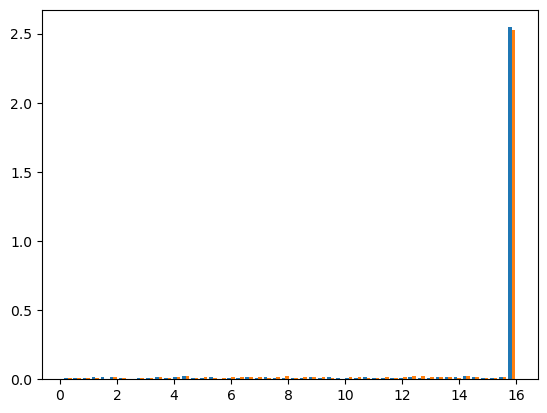

In [ ]:
import numpy as np
y_train = pheno_df_train.Event_time.loc[pheno_df_train.Event_time < np.inf]  
y_test = pheno_df_test.Event_time.loc[pheno_df_test.Event_time < np.inf]  
plt.hist([y_train, y_test], bins=50, label=['train', 'test'], density=True)

In [ ]:
df = pheno_df_test.copy()

nan_cols= df.isnull() 

In [ ]:
nan_cols.sum()

Age                    0
BodyMassIndex          0
Smoking=1              0
BPTreatment=1          0
PrevalentDiabetes=1    0
PrevalentCHD=1         0
Event                  0
Event_time             0
SystolicBP             0
NonHDLcholesterol      0
Sex=1                  0
dtype: int64

In [ ]:
df.shape[0] -  df.dropna().shape[0]

0

In [ ]:
 

if np.any(np.isnan(preds_test)) or np.any(np.isinf(preds_test)):
    raise ValueError('Predictions contain invalid values (NaN or inf)')


NameError: name 'preds_test' is not defined

Number of rows with missing values: 0
Please provide an imputation method
Column Smoking has 11 missing values
Column PrevalentDiabetes has 30 missing values
Column PrevalentCHD has 30 missing values
Column PrevalentHFAIL has 30 missing values
Column Event has 30 missing values
Column Event_time has 30 missing values
Column SystolicBP has 1 missing values
Column NonHDLcholesterol has 3 missing values
Number of rows with missing values: 45
Please provide an imputation method


,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_2211,73.860,30.140,1.0,1,0.0,0.0,0.0,0.0,15.910,154.046,5.010,0
1,Simulated_1629,48.070,18.252,1.0,0,0.0,0.0,0.0,0.0,11.189,184.064,3.922,0
2,Simulated_1690,49.060,25.911,0.0,0,0.0,0.0,0.0,1.0,15.832,126.922,5.119,1
3,Simulated_1367,58.499,25.739,0.0,0,0.0,0.0,0.0,0.0,15.818,141.003,3.890,1
4,Simulated_3387,47.242,29.227,0.0,0,0.0,0.0,0.0,0.0,15.782,143.021,3.611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,Simulated_1628,56.091,25.580,1.0,0,0.0,0.0,1.0,0.0,-10.830,169.903,4.480,1
1805,Simulated_3424,46.889,22.762,0.0,0,0.0,0.0,0.0,0.0,15.940,122.995,3.669,0
1806,Simulated_2215,70.841,24.808,0.0,0,0.0,0.0,0.0,0.0,3.542,190.934,6.069,1
1807,Simulated_3426,25.920,20.520,0.0,0,0.0,0.0,0.0,0.0,15.901,117.032,2.789,1


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import sklearn 
from sksurv.functions import StepFunction
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import cumulative_dynamic_auc 
from model_evaluation import evaluate_model
from sksurv.column import encode_categorical
from sksurv.ensemble import RandomSurvivalForest
from dotenv import load_dotenv
import os
from preprocessing import prepare_train_test

In [35]:
model = CoxPHSurvivalAnalysis(alpha=0, ties='breslow', n_iter=100, tol=1e-09, verbose=0)
  
covariates = ['Sex', 'Age']

X_train, X_test, y_train, y_test, test_sample_ids = prepare_train_test(pheno_df_train, pheno_df_test, covariates)
 